In [155]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
plt.style.use('classic')

# Data preprocessing and feature engineering
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Feature selection
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Imbalanced data handling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Other useful libraries
import warnings
warnings.filterwarnings('ignore')  # To suppress warnings
import pickle  # To save the model
import os


In [2]:
election = pd.read_csv("./Dataset/Election_Data.csv")

### Exploratory Data Analysis

In [4]:
election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


$Tony Blair$ : He was the leader of the Labour Party and the Prime Minister of the United Kingdom from 1997 to 2007.

$William Hague$ : He was the leader of the Conservative Party from 1997 to 2001.

Therefore, the "Blair" and "Hague" columns likely represent survey respondents' opinions or favorability ratings of these two political figures at the time of the survey. The values in these columns (ranging from 1 to 5, as we saw in the describe() output) probably indicate a Likert scale, where:

1 = Very unfavorable opinion

5 = Very favorable opinion

In [6]:
election.shape

(1525, 10)

In [7]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [8]:
election.vote.unique()

array(['Labour', 'Conservative'], dtype=object)

In [9]:
print(election.describe())

        Unnamed: 0          age  economic.cond.national  \
count  1525.000000  1525.000000             1525.000000   
mean    763.000000    54.182295                3.245902   
std     440.373894    15.711209                0.880969   
min       1.000000    24.000000                1.000000   
25%     382.000000    41.000000                3.000000   
50%     763.000000    53.000000                3.000000   
75%    1144.000000    67.000000                4.000000   
max    1525.000000    93.000000                5.000000   

       economic.cond.household        Blair        Hague       Europe  \
count              1525.000000  1525.000000  1525.000000  1525.000000   
mean                  3.140328     3.334426     2.746885     6.728525   
std                   0.929951     1.174824     1.230703     3.297538   
min                   1.000000     1.000000     1.000000     1.000000   
25%                   3.000000     2.000000     2.000000     4.000000   
50%                   3.000000

In [10]:
round(election.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.00,440.37,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.18,15.71,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.25,0.88,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.14,0.93,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.33,1.17,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.75,1.23,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.73,3.30,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.54,1.08,0.0,0.0,2.0,2.0,3.0


In [11]:
election = election.drop('Unnamed: 0', axis=1)

In [12]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [13]:
print(election['vote'].value_counts())
print(election['gender'].value_counts())

vote
Labour          1063
Conservative     462
Name: count, dtype: int64
gender
female    812
male      713
Name: count, dtype: int64


In [14]:
election.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

###### No null values, so no need of null value treatment

#### Univariate Analysis

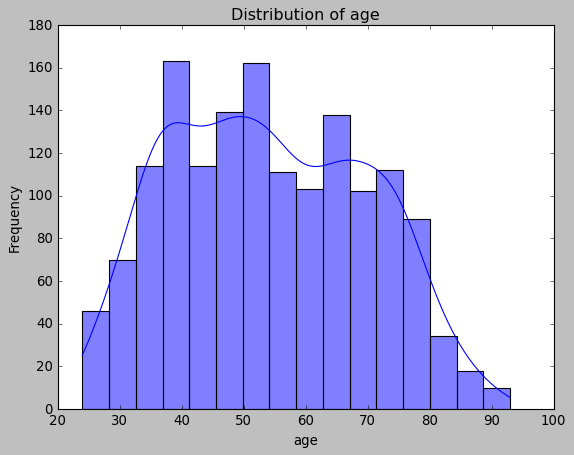

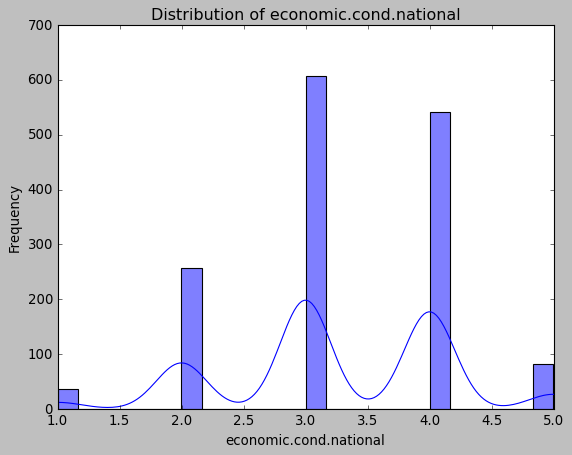

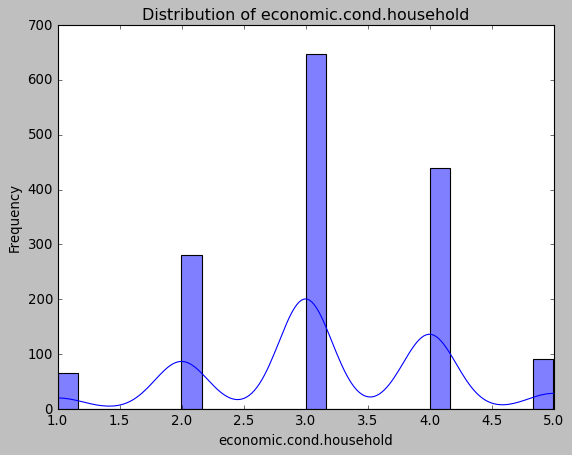

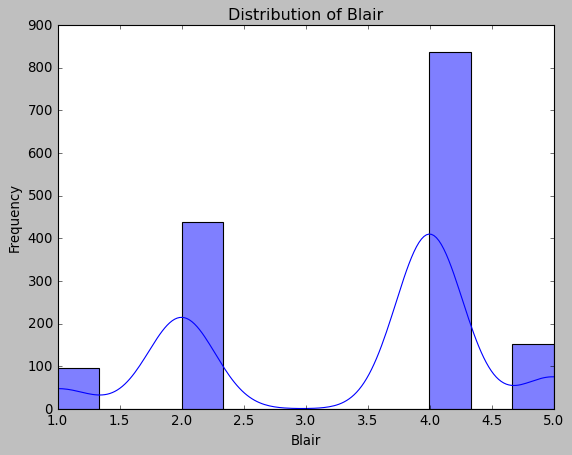

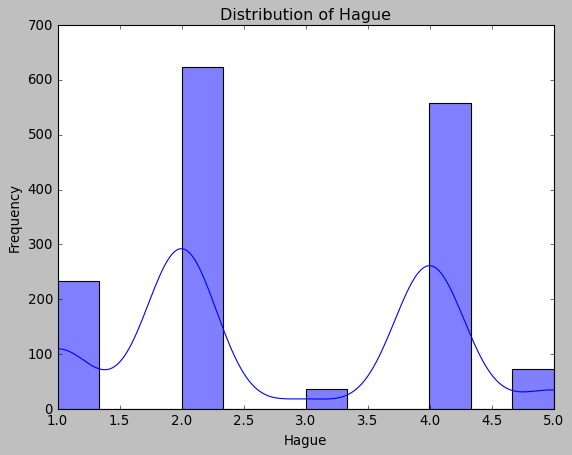

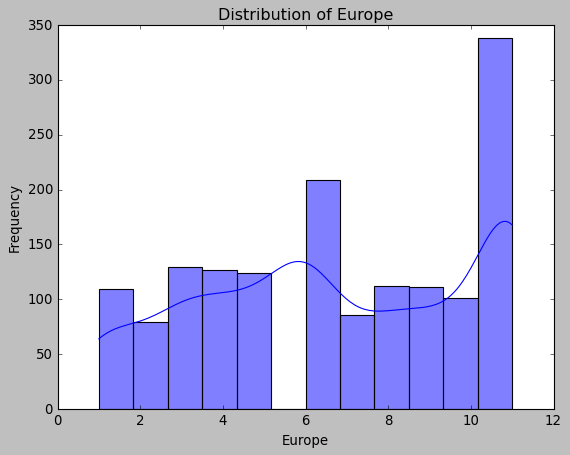

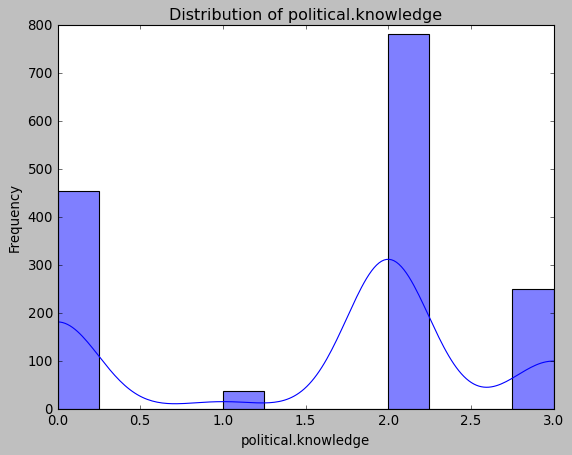

In [17]:
numerical_features = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(election[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [18]:
### Separating Numerical and Categorical Columns

num = []
cat = []

for col in election.columns:
    if pd.api.types.is_numeric_dtype(election[col]):
        num.append(col)
    else:
        cat.append(col)

print("Numerical Columns:", num)
print("Categorical Columns:", cat)

Numerical Columns: ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']
Categorical Columns: ['vote', 'gender']


In [19]:
num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

In [20]:
cat

['vote', 'gender']

#### Bivariate Analysis

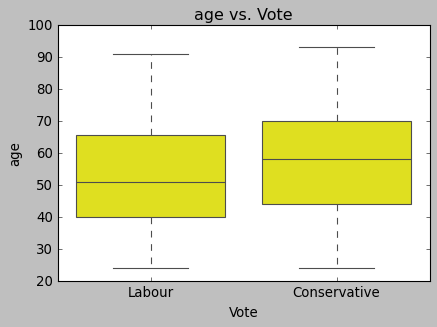

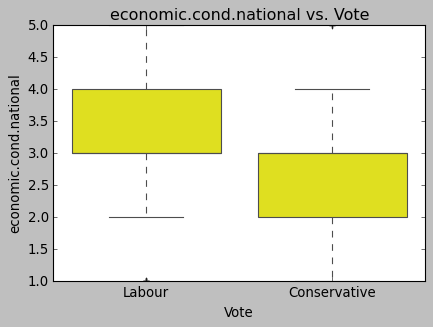

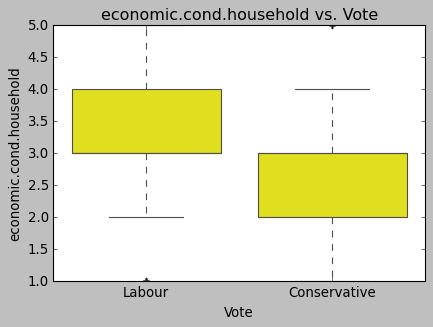

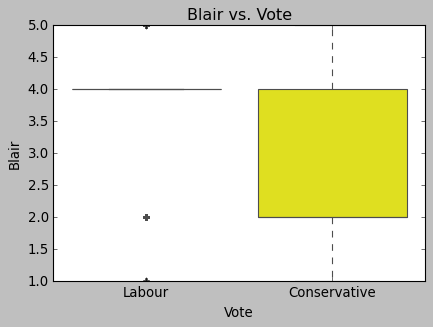

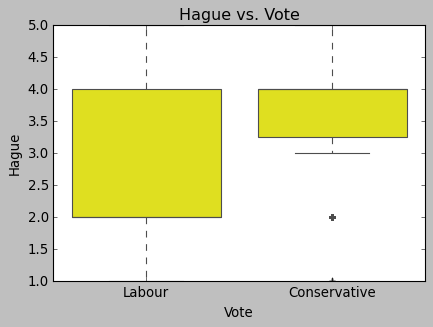

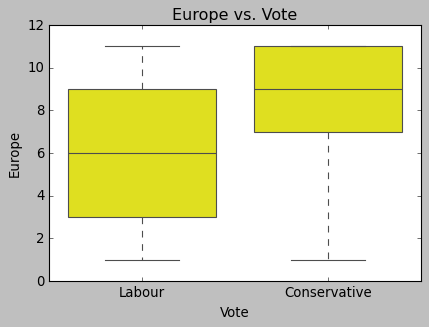

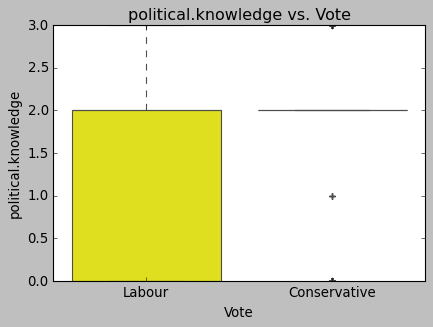

In [22]:
numerical_features = num
numerical_features = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))  # Reduced figure size
    sns.boxplot(x='vote', y=feature, data=election, color='yellow')
    plt.title(f'{feature} vs. Vote')
    plt.xlabel('Vote')
    plt.ylabel(feature)
    plt.show()

In [23]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [24]:
### Label Encoding Categorical Columns

In [25]:
election['gender'] = election['gender'].replace(to_replace=['male', 'female'], value=[1, 0])
election['vote'] = election['vote'].replace(to_replace=['Labour', 'Conservative'], value=[1, 0])

In [26]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [27]:
num

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

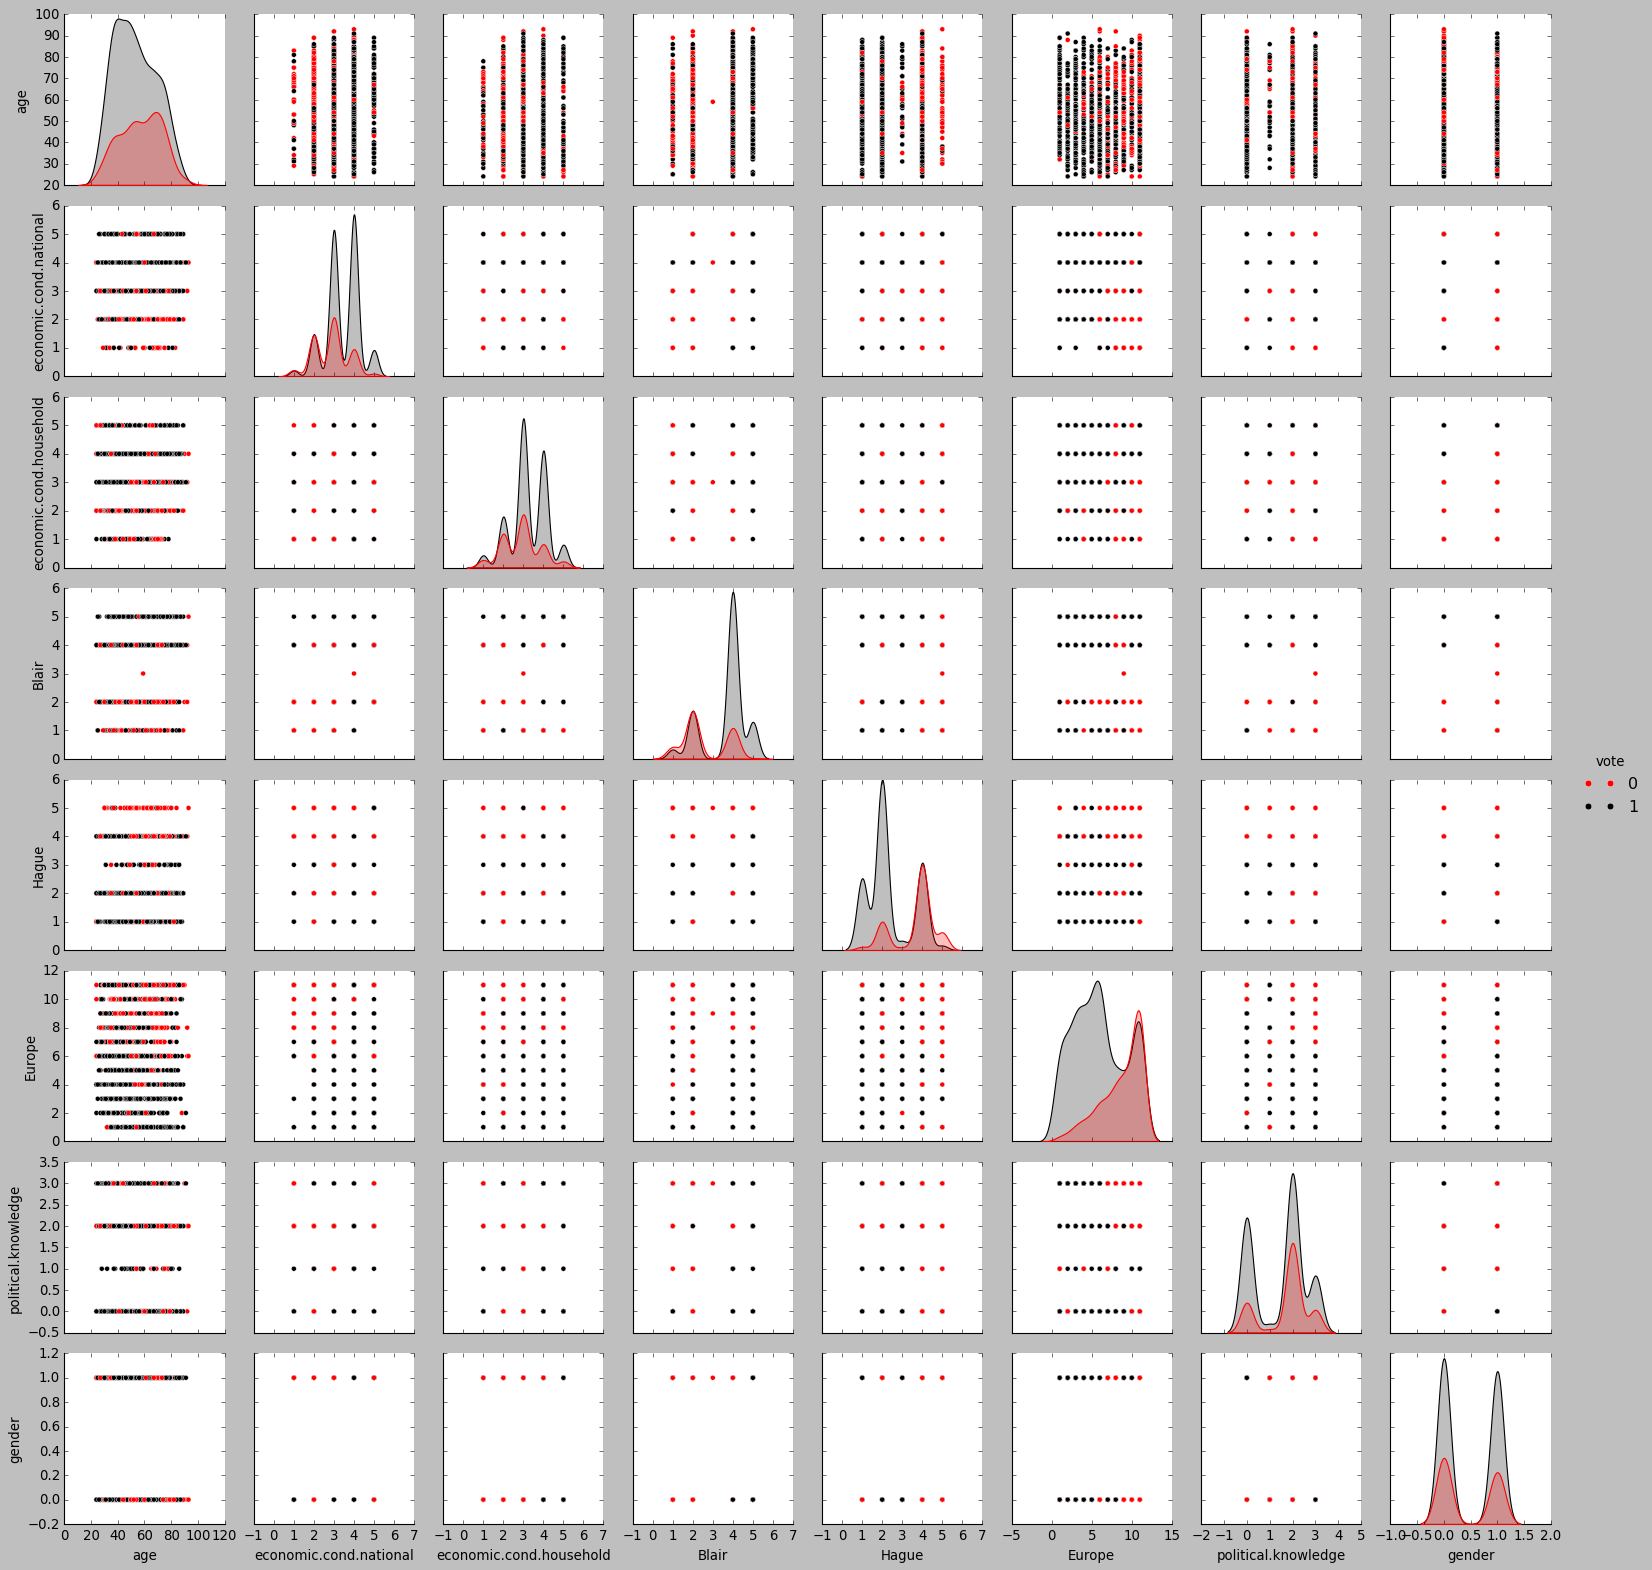

In [28]:
# Set the Matplotlib style to 'dark_background'
# plt.style.use('dark_background')

# Set the theme and style
# sns.set_style(style="darkgrid")
# sns.set_palette("magma")

sns.pairplot(election[['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge', 'vote', 'gender']],
             hue='vote',
             palette=['red','black']) 

In [29]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int64
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int64
dtypes: int64(9)
memory usage: 107.4 KB


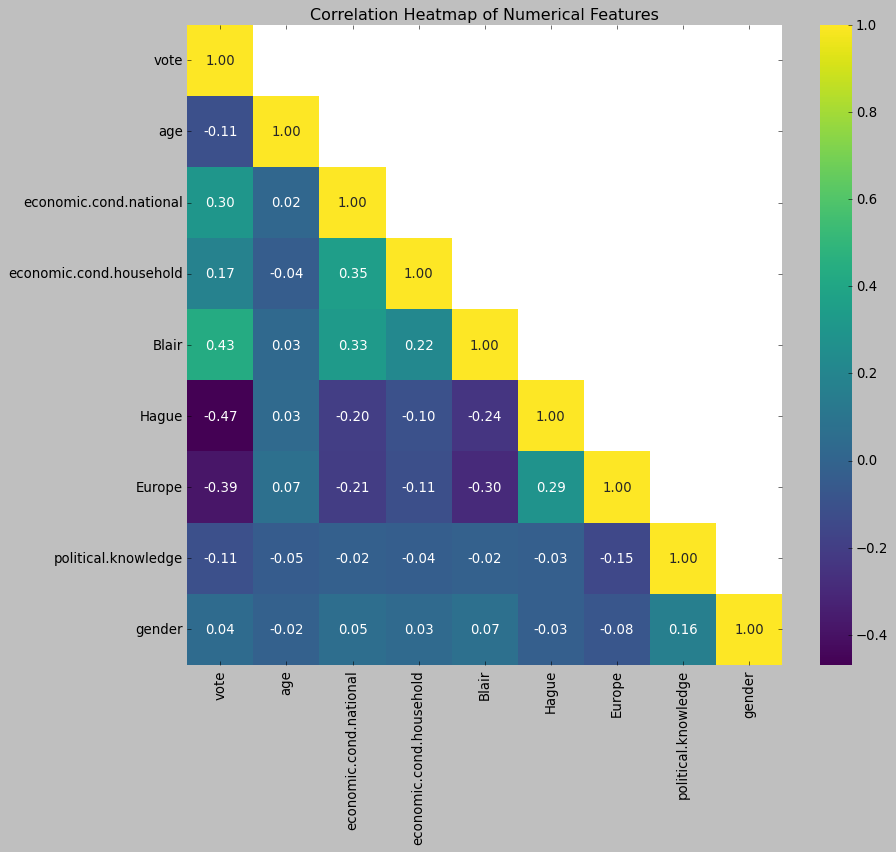

In [30]:
correlation_matrix = election.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", mask=np.triu(election.corr(),+1)); #triu means trim the upper part)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<Axes: >

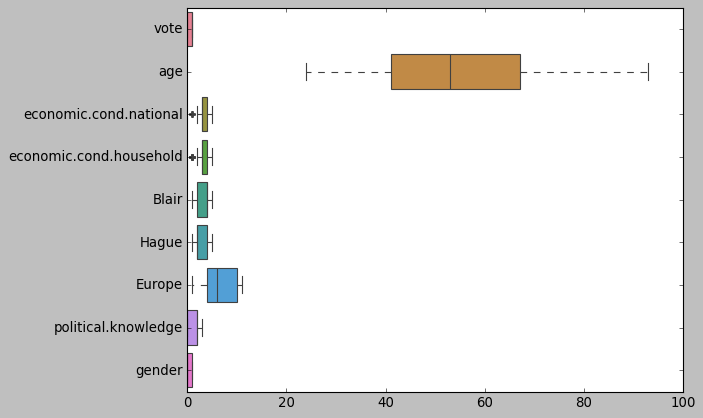

In [31]:
sns.boxplot(election, orient='h')

<Axes: xlabel='vote', ylabel='count'>

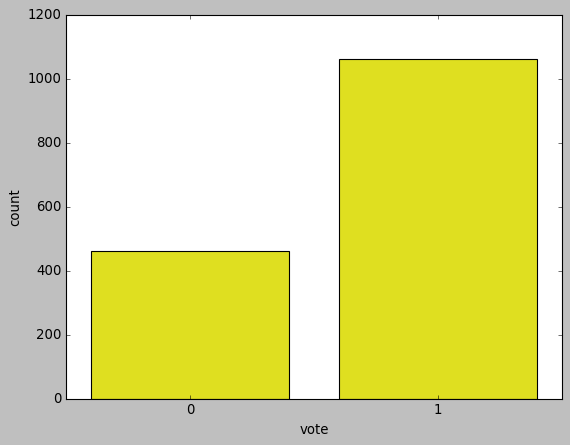

In [32]:
sns.countplot(x='vote', data=election, color="yellow")

<Axes: xlabel='gender', ylabel='count'>

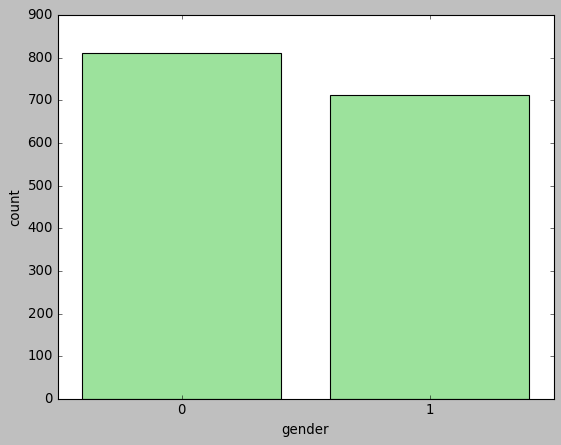

In [33]:
sns.countplot(x='gender', data=election, color="lightgreen")

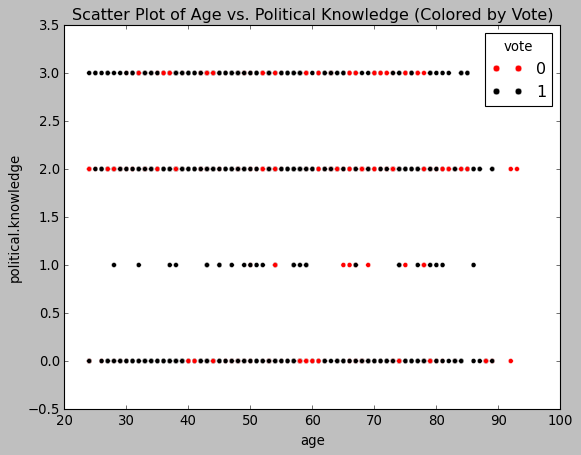

In [34]:
sns.scatterplot(data=election, x='age', y='political.knowledge', hue='vote', palette=['red','black'])  # 'hue' adds color for different vote categories
plt.title('Scatter Plot of Age vs. Political Knowledge (Colored by Vote)')
plt.show()

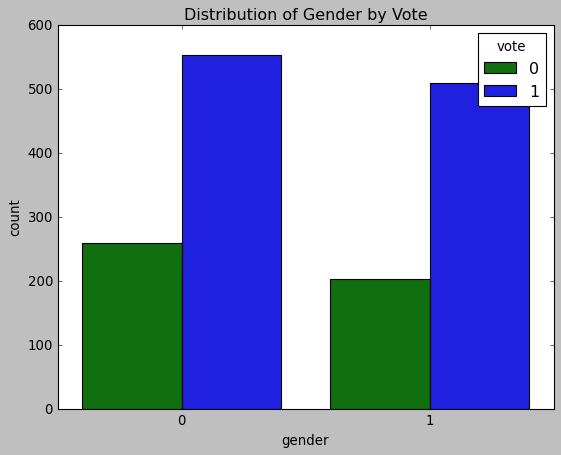

In [35]:
sns.countplot(data=election, x='gender', hue='vote', palette=['green', 'blue'])
plt.title('Distribution of Gender by Vote')
plt.show()

#### Outlier Removal / Treatment

In [37]:
def remove_outlier(col):
    """
    Calculates the lower and upper ranges for outlier detection using the IQR method.

    Args:
        col (pd.Series): The column to check for outliers.

    Returns:
        tuple: A tuple containing the lower and upper ranges for outlier detection.
    """
    sorted(col)
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range


numerical_features = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

for column in election[numerical_features].columns:
    lr, ur = remove_outlier(election[column])
    election[column] = np.where(election[column] > ur, ur, election[column])
    election[column] = np.where(election[column] < lr, lr, election[column])


In [38]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,1,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,1,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,1,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


### Feature Engineering

In [40]:
# Combined Economic Condition by averaging

election['economic.condition.combined'] = (election['economic.cond.national'] + election['economic.cond.household']) / 2


In [41]:
# Opinion Difference
election['opinion.difference'] = election['Blair'] - election['Hague']

In [42]:
# Political Engagement:

election['political.engagement'] = election['political.knowledge'] * (election['Europe']/11)  # Scale Europe to be between 0 and 1

In [43]:
# Age Group:

def categorize_age(age):
    if age <= 25:
        return '18-25'
    elif age <= 40:
        return '26-40'
    elif age <= 60:
        return '41-60'
    else:
        return '61+'

election['age_group'] = election['age'].apply(categorize_age)


In [44]:
#  Europe Opinion Category
def categorize_europe(opinion):
    if opinion <= 4:
        return 'Against'
    elif opinion <= 7:
        return 'Neutral'
    else:
        return 'For'

election['Europe_category'] = election['Europe'].apply(categorize_europe)


In [45]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,economic.condition.combined,opinion.difference,political.engagement,age_group,Europe_category
0,1,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0,3.0,3.0,0.363636,41-60,Against
1,1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1,4.0,0.0,0.909091,26-40,Neutral
2,1,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1,4.0,3.0,0.545455,26-40,Against
3,1,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0,3.0,1.0,0.000000,18-25,Against
4,1,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1,2.0,0.0,1.090909,41-60,Neutral


### One Hot Encoding

In [47]:
# Assuming 'gender', 'age_group', and 'Europe_category' are the columns you want to one-hot encode
election = pd.get_dummies(election, columns=['gender', 'age_group', 'Europe_category'], drop_first=True)

election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,economic.condition.combined,opinion.difference,political.engagement,gender_1,age_group_26-40,age_group_41-60,age_group_61+,Europe_category_For,Europe_category_Neutral
0,1,43.0,3.0,3.0,4.0,1.0,2.0,2.0,3.0,3.0,0.363636,False,False,True,False,False,False
1,1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,0.0,0.909091,True,True,False,False,False,True
2,1,35.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0,3.0,0.545455,True,True,False,False,False,False
3,1,24.0,4.0,2.0,2.0,1.0,4.0,0.0,3.0,1.0,0.000000,False,False,False,False,False,False
4,1,41.0,2.0,2.0,1.0,1.0,6.0,2.0,2.0,0.0,1.090909,True,False,True,False,False,True


#### Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features (excluding one-hot encoded features)
numerical_features = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']

# Scale numerical features
scaler = StandardScaler()
election[numerical_features] = scaler.fit_transform(election[numerical_features])

In [79]:
election.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,economic.condition.combined,opinion.difference,political.engagement,gender_1,age_group_26-40,age_group_41-60,age_group_61+,Europe_category_For,Europe_category_Neutral
0,1,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,3.0,3.0,0.363636,False,False,True,False,False,False
1,1,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,4.0,0.0,0.909091,True,True,False,False,False,True
2,1,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,4.0,3.0,0.545455,True,True,False,False,False,False
3,1,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,3.0,1.0,0.000000,False,False,False,False,False,False
4,1,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,2.0,0.0,1.090909,True,False,True,False,False,True


## Splitting in Test - Train Data

In [50]:
# Split the data into training and testing sets
X = election.drop('vote', axis=1)
y = election['vote']

# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,economic.condition.combined,opinion.difference,political.engagement,gender_1,age_group_26-40,age_group_41-60,age_group_61+,Europe_category_For,Europe_category_Neutral
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,3.0,3.0,0.363636,False,False,True,False,False,False
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,0.0,0.909091,True,True,False,False,False,True
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,4.0,3.0,0.545455,True,True,False,False,False,False
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,3.0,1.0,0.000000,False,False,False,False,False,False
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,2.0,0.0,1.090909,True,False,True,False,False,True


In [83]:
y.value_counts()

vote
1    1063
0     462
Name: count, dtype: int64

In [85]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the training and testing sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1143, 16)
X_test shape: (382, 16)
y_train shape: (1143,)
y_test shape: (382,)


## Model Building & Evaluation
---

#### Model Evaluation

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

import matplotlib.style
plt.style.use('classic')

In [91]:
# for Train data

def evaluate_train_model(model):
    y_train_predict = model.predict(X_train)

    Acc_train = print(model.score(X_train, y_train))

    # Add gray background
    plt.gca().set_facecolor('grey')

    CM_train = print(sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted')
    plt.ylabel('Actuals', rotation=0)
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_train = print(metrics.classification_report(y_train, y_train_predict))

    probs = model.predict_proba(X_train)
    probs = probs[:, 1]
    auc_train = roc_auc_score(y_train, probs)
    
    return Acc_train, CM_train, CR_train, auc_train
    

In [93]:
# for Test Data

def evaluate_test_model(model):
    y_test_predict = model.predict(X_test)

    Acc_test = print("The accuracuy of the model is {}".format(model.score(X_test,y_test)))

    CM_test = print(sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_test = print(metrics.classification_report(y_test,y_test_predict))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    auc_test = roc_auc_score(y_test, probs)
    
    return Acc_test,CM_test,CR_test,auc_test

#### Logistic Regression

In [96]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [98]:
# Make predictions on the test set
y_train_predict = model.predict(X_train)

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       351
           1       0.88      0.91      0.89       792

    accuracy                           0.85      1143
   macro avg       0.83      0.81      0.82      1143
weighted avg       0.85      0.85      0.85      1143



0.8512685914260717
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       351
           1       0.88      0.91      0.89       792

    accuracy                           0.85      1143
   macro avg       0.83      0.81      0.82      1143
weighted avg       0.85      0.85      0.85      1143



(None, None, None, 0.911391335002446)

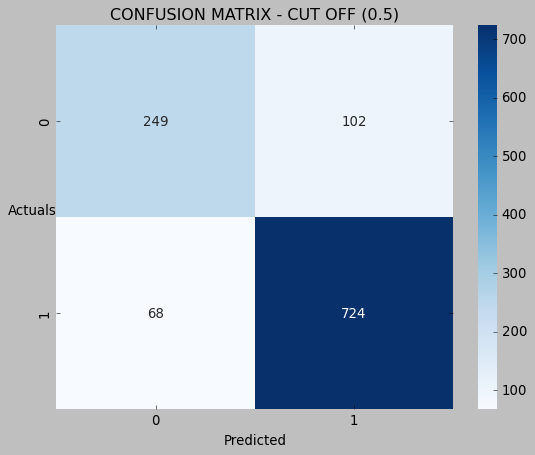

In [100]:
evaluate_train_model(model)

The accuracuy of the model is 0.7958115183246073
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       111
           1       0.84      0.89      0.86       271

    accuracy                           0.80       382
   macro avg       0.75      0.73      0.74       382
weighted avg       0.79      0.80      0.79       382



(None, None, None, 0.8722116950899239)

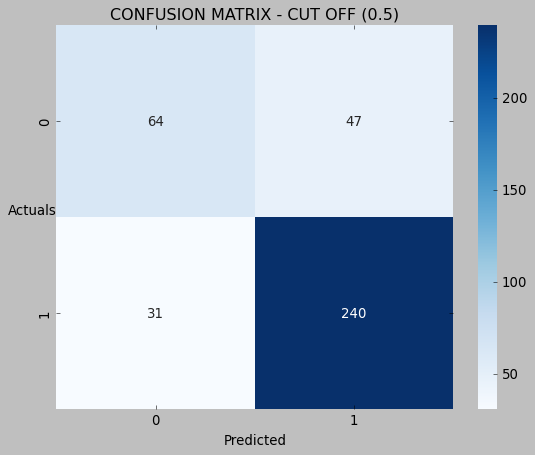

In [102]:
evaluate_test_model(model)

#### Decision Tree

In [108]:
# Decision Tree
dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

0.9991251093613298
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143



(None, None, None, 0.9999982013870903)

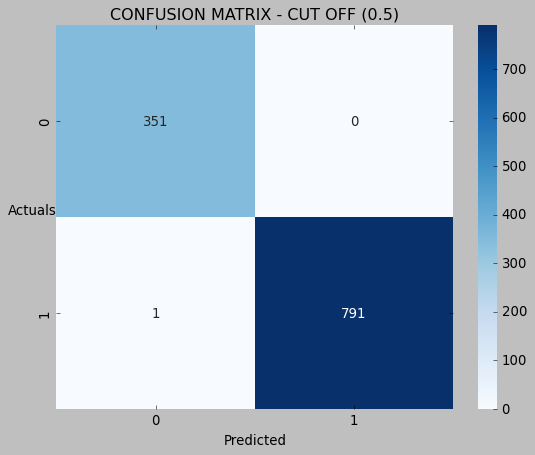

In [110]:
evaluate_train_model(dt_model)

The accuracuy of the model is 0.7591623036649214
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       111
           1       0.84      0.81      0.83       271

    accuracy                           0.76       382
   macro avg       0.71      0.72      0.72       382
weighted avg       0.77      0.76      0.76       382



(None, None, None, 0.7212193743559058)

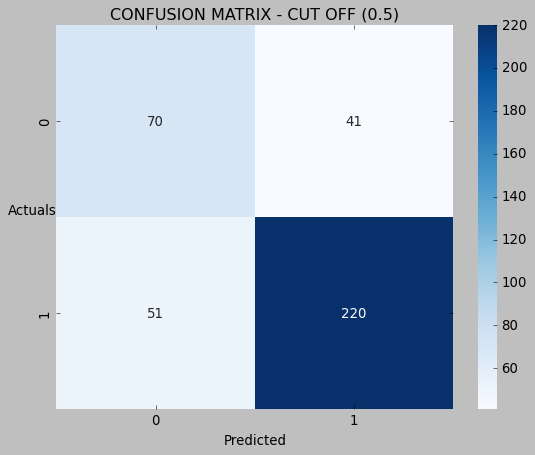

In [112]:
evaluate_test_model(dt_model)

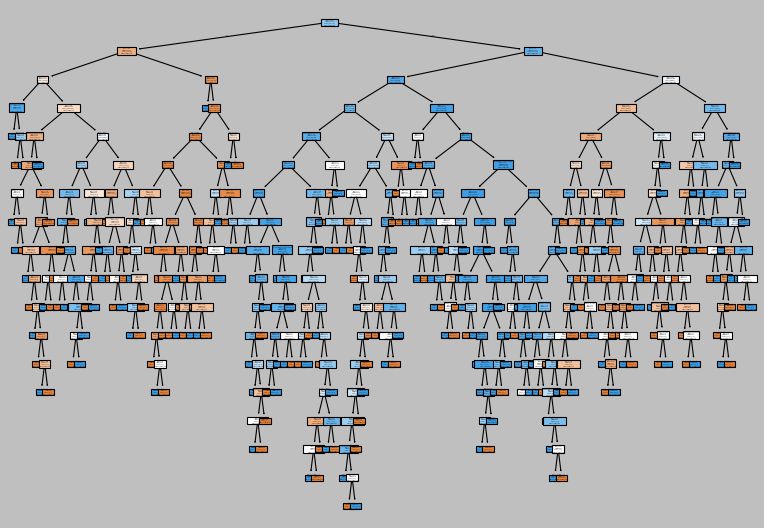

In [114]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have a trained DecisionTreeClassifier model named 'dt_model' and 
# your feature data is in a Pandas DataFrame named 'X'

plt.figure(figsize=(12, 8))

plot_tree(dt_model, 
          feature_names=X.columns,  # Replace X with your feature DataFrame
          class_names=["Default_Yes", "Default_No"], # Replace with your class names if needed
          filled=True)

plt.show()

In [116]:
dt_model.feature_importances_

array([0.18047998, 0.04332079, 0.03324598, 0.02516371, 0.01644308,
       0.05905329, 0.02736843, 0.05879342, 0.34115542, 0.16056904,
       0.02434436, 0.00343342, 0.00893594, 0.0066314 , 0.        ,
       0.01106175])

In [118]:
len(dt_model.feature_importances_)

16

In [120]:
pd.DataFrame(dt_model.feature_importances_*100
             ,index = X.columns, columns=['Imp']).sort_values(by='Imp', ascending=False)

,Imp
opinion.difference,34.115542
age,18.047998
political.engagement,16.056904
Europe,5.905329
economic.condition.combined,5.879342
economic.cond.national,4.332079
economic.cond.household,3.324598
political.knowledge,2.736843
Blair,2.516371
gender_1,2.434436


#### DT Pruning

In [123]:
dt_model_pru = DecisionTreeClassifier(criterion= 'gini', 
                                      max_depth= 7, 
                                      min_samples_leaf=30, 
                                      min_samples_split=20,
                                      max_leaf_nodes=7
                                     )

In [125]:
dt_model_pru.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=7, min_samples_leaf=30,
                       min_samples_split=20)

0.8363954505686789
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       351
           1       0.89      0.87      0.88       792

    accuracy                           0.84      1143
   macro avg       0.81      0.81      0.81      1143
weighted avg       0.84      0.84      0.84      1143



(None, None, None, 0.8875561167227832)

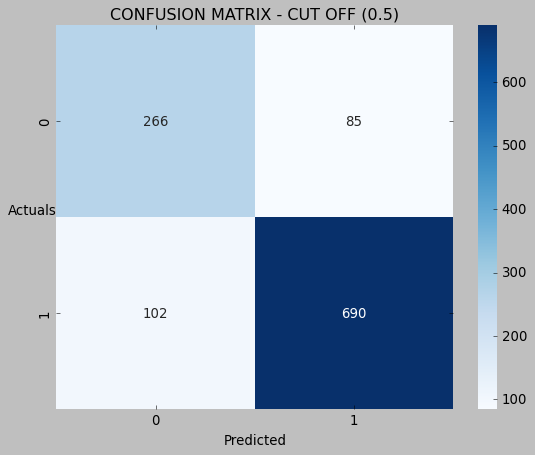

In [129]:
evaluate_train_model(dt_model_pru)

The accuracuy of the model is 0.8036649214659686
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       111
           1       0.88      0.84      0.86       271

    accuracy                           0.80       382
   macro avg       0.76      0.78      0.77       382
weighted avg       0.81      0.80      0.81       382



(None, None, None, 0.8657624414081979)

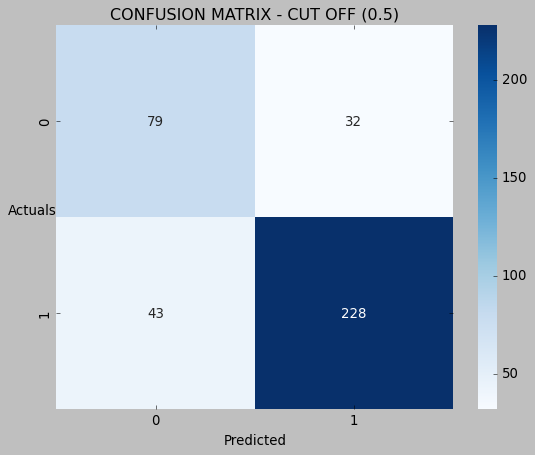

In [131]:
evaluate_test_model(dt_model_pru)

## Running Grid Search for Decision Tree Classifier
---

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': [None, 'balanced']          # Handle class imbalance
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall',                       # Focus on Labour voters
    cv=3,                                   # Reduce folds for faster computation
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall:", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 810 candidates, totalling 2430 fits
Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6}
Best recall: 0.8989898989898989


0.8862642169728784
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       351
           1       0.91      0.93      0.92       792

    accuracy                           0.89      1143
   macro avg       0.87      0.86      0.86      1143
weighted avg       0.89      0.89      0.89      1143



(None, None, None, 0.9393993352326686)

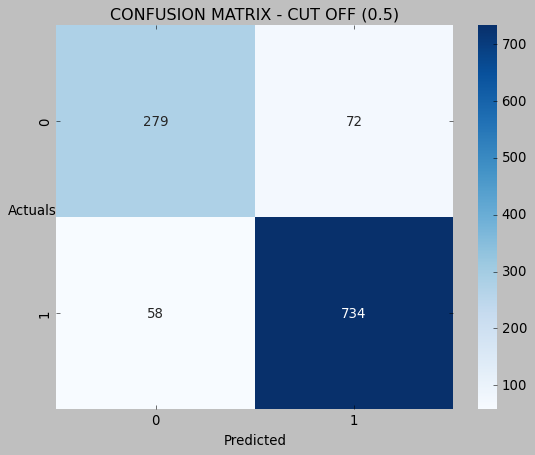

In [139]:
evaluate_train_model(best_model)

The accuracuy of the model is 0.7984293193717278
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       111
           1       0.86      0.86      0.86       271

    accuracy                           0.80       382
   macro avg       0.76      0.75      0.75       382
weighted avg       0.80      0.80      0.80       382



(None, None, None, 0.8342309098766664)

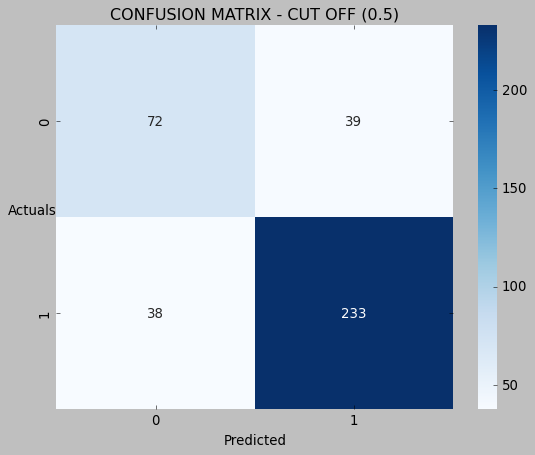

In [141]:
evaluate_test_model(best_model)

## Ensembling
---

### Bagging

In [145]:
bgcl = BaggingClassifier(estimator= dt_model, n_estimators= 5)

In [147]:
bgcl.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

0.9711286089238845
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       351
           1       0.98      0.98      0.98       792

    accuracy                           0.97      1143
   macro avg       0.97      0.97      0.97      1143
weighted avg       0.97      0.97      0.97      1143



(None, None, None, 0.9937839937839937)

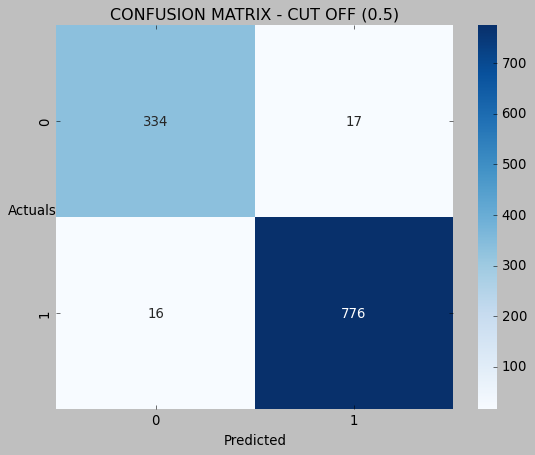

In [149]:
evaluate_train_model(bgcl)

The accuracuy of the model is 0.7827225130890052
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.63      0.60      0.62       111
           1       0.84      0.86      0.85       271

    accuracy                           0.78       382
   macro avg       0.74      0.73      0.73       382
weighted avg       0.78      0.78      0.78       382



(None, None, None, 0.8307403344303712)

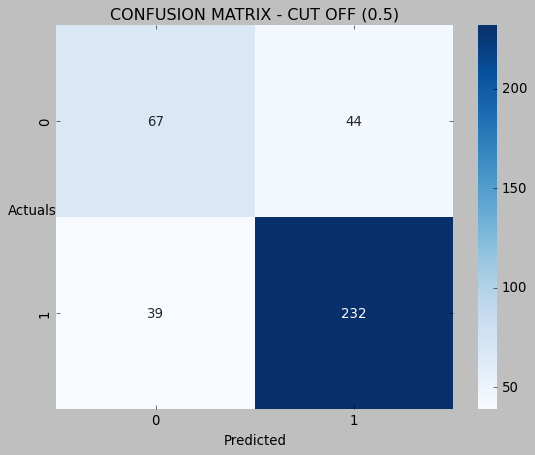

In [151]:
evaluate_test_model(bgcl)

In [157]:
from sklearn.model_selection import GridSearchCV

# Define the base estimator
base_tree = DecisionTreeClassifier(random_state=42)

# Instantiate BaggingClassifier with the base estimator
bgcl = BaggingClassifier(estimator=base_tree, random_state=42, oob_score=True) # Enable oob_score

# Define the parameter grid
param_grid = {
    'n_estimators': range(10, 51, 10),
    'max_samples': [0.7, 0.9],
    'max_features': [0.7, 0.9]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=bgcl,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall:", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 50}
Best recall: 0.904040404040404


In [159]:
best_model

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_features=0.7, max_samples=0.7, n_estimators=50,
                  oob_score=True, random_state=42)

0.9877515310586177
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       351
           1       0.99      1.00      0.99       792

    accuracy                           0.99      1143
   macro avg       0.99      0.98      0.99      1143
weighted avg       0.99      0.99      0.99      1143



(None, None, None, 0.9990575268353047)

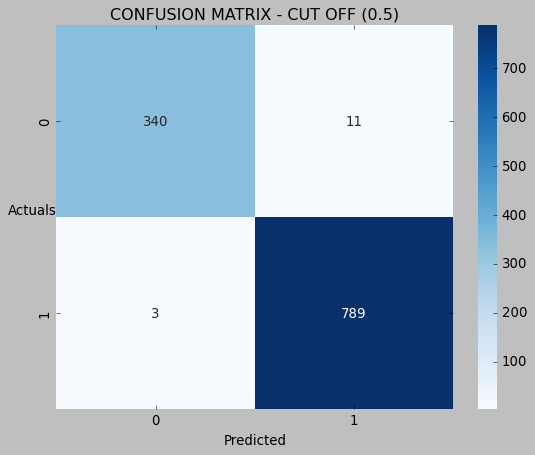

In [161]:
evaluate_train_model(best_model)

The accuracuy of the model is 0.806282722513089
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       111
           1       0.85      0.88      0.87       271

    accuracy                           0.81       382
   macro avg       0.77      0.75      0.76       382
weighted avg       0.80      0.81      0.80       382



(None, None, None, 0.8659120374987535)

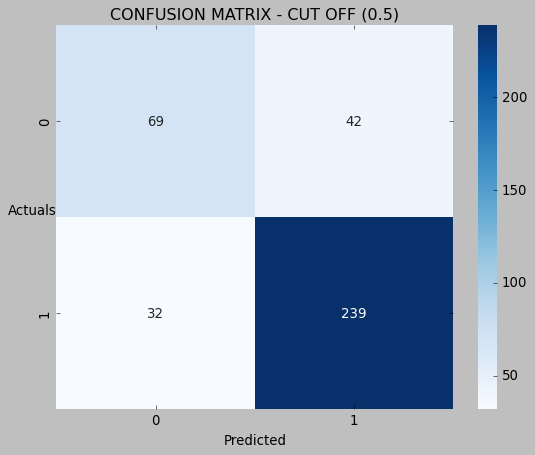

In [163]:
evaluate_test_model(best_model)

### Boosting

##### Ada Boosting

In [167]:
AD_Boost = AdaBoostClassifier()

In [169]:
AD_Boost.fit(X_train, y_train)

AdaBoostClassifier()

0.8617672790901137
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       351
           1       0.90      0.91      0.90       792

    accuracy                           0.86      1143
   macro avg       0.84      0.83      0.84      1143
weighted avg       0.86      0.86      0.86      1143



(None, None, None, 0.9286778036778036)

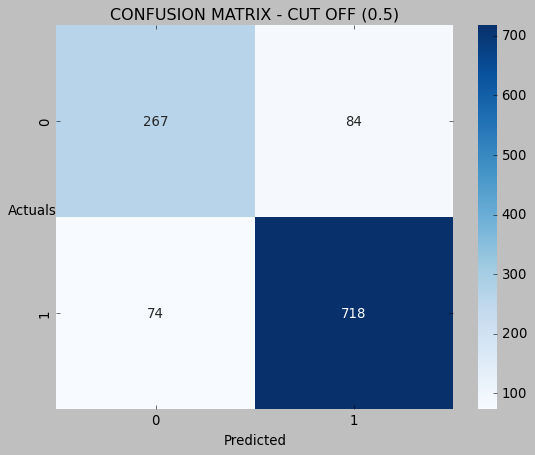

In [171]:
evaluate_train_model(AD_Boost)

The accuracuy of the model is 0.8089005235602095
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       111
           1       0.86      0.87      0.87       271

    accuracy                           0.81       382
   macro avg       0.77      0.76      0.77       382
weighted avg       0.81      0.81      0.81       382



(None, None, None, 0.8704165420032579)

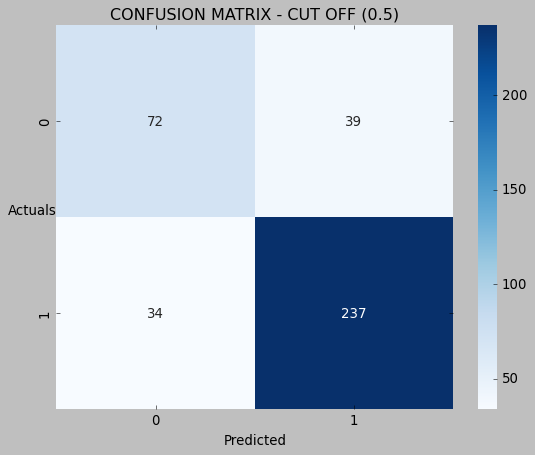

In [173]:
evaluate_test_model(AD_Boost)

##### Gradient Boosting

In [176]:
GB_Boost = GradientBoostingClassifier()

GB_Boost.fit(X_train, y_train)

GradientBoostingClassifier()

0.8993875765529309
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       351
           1       0.92      0.94      0.93       792

    accuracy                           0.90      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.90      0.90      0.90      1143



(None, None, None, 0.9538385996719331)

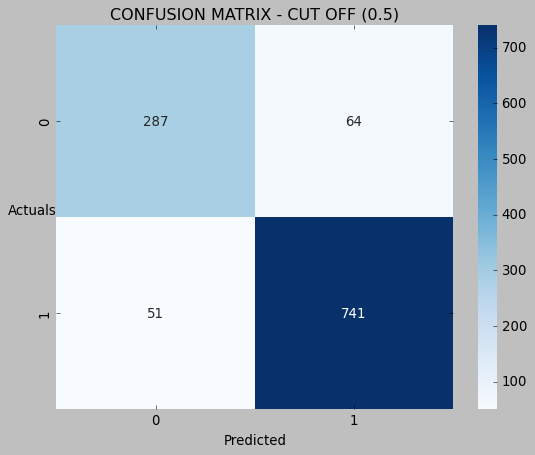

In [178]:
evaluate_train_model(GB_Boost)

The accuracuy of the model is 0.8036649214659686
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       111
           1       0.86      0.87      0.86       271

    accuracy                           0.80       382
   macro avg       0.76      0.76      0.76       382
weighted avg       0.80      0.80      0.80       382



(None, None, None, 0.8832818057910309)

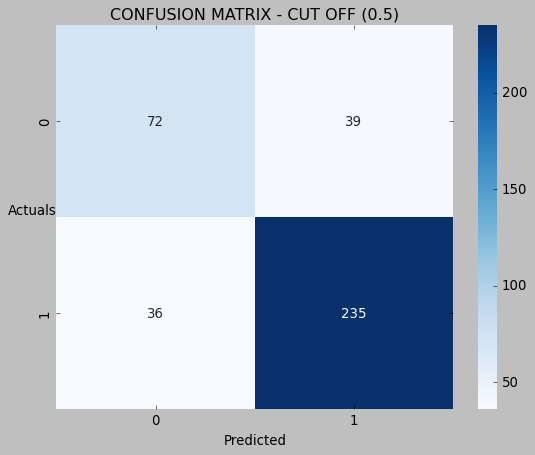

In [180]:
evaluate_test_model(GB_Boost)

##### XG Boost (Extreme Gradient Boosting)

In [183]:
!pip install xgboost

In [185]:
import xgboost as xgb
from xgboost import XGBClassifier

In [187]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1143 entries, 1478 to 1126
Series name: vote
Non-Null Count  Dtype
--------------  -----
1143 non-null   int64
dtypes: int64(1)
memory usage: 17.9 KB


In [189]:
XG_Boost = xgb.XGBClassifier()
XG_Boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

0.9965004374453194
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       351
           1       0.99      1.00      1.00       792

    accuracy                           1.00      1143
   macro avg       1.00      0.99      1.00      1143
weighted avg       1.00      1.00      1.00      1143



(None, None, None, 0.9998255345477567)

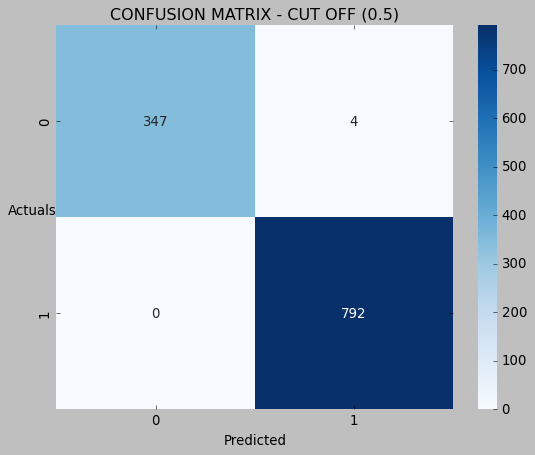

In [191]:
evaluate_train_model(XG_Boost)

The accuracuy of the model is 0.7958115183246073
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       111
           1       0.85      0.86      0.86       271

    accuracy                           0.80       382
   macro avg       0.75      0.75      0.75       382
weighted avg       0.79      0.80      0.80       382



(None, None, None, 0.8587480469399288)

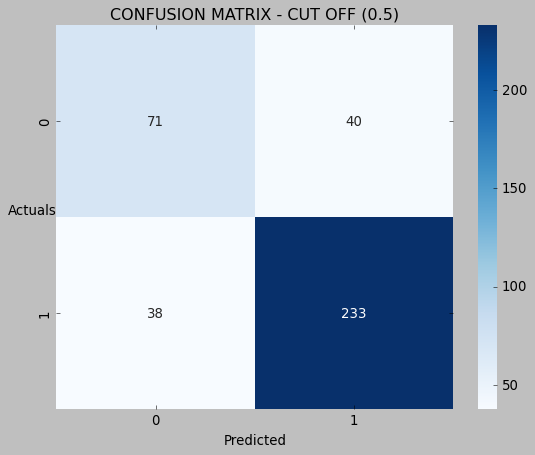

In [193]:
evaluate_test_model(XG_Boost)

## KNN Classification

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are already defined

accuracy_scores = []
recall_scores = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)  # Changed 'k' to 'i' for iteration
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class problems

    # Store results
    accuracy_scores.append(acc)
    recall_scores.append(rec)

    print(f"k={i}: Accuracy={acc:.4f}, Recall={rec:.4f}")

k=1: Accuracy=0.7775, Recall=0.7395
k=2: Accuracy=0.7330, Recall=0.7453
k=3: Accuracy=0.7618, Recall=0.7071
k=4: Accuracy=0.7592, Recall=0.7265
k=5: Accuracy=0.7827, Recall=0.7192
k=6: Accuracy=0.7958, Recall=0.7550
k=7: Accuracy=0.7853, Recall=0.7264
k=8: Accuracy=0.7801, Recall=0.7360
k=9: Accuracy=0.7880, Recall=0.7282
k=10: Accuracy=0.7827, Recall=0.7378
k=11: Accuracy=0.7906, Recall=0.7354
k=12: Accuracy=0.7827, Recall=0.7378
k=13: Accuracy=0.7853, Recall=0.7264
k=14: Accuracy=0.7827, Recall=0.7298
k=15: Accuracy=0.7853, Recall=0.7290
k=16: Accuracy=0.7932, Recall=0.7452
k=17: Accuracy=0.7880, Recall=0.7309
k=18: Accuracy=0.7853, Recall=0.7317
k=19: Accuracy=0.7932, Recall=0.7319
k=20: Accuracy=0.7932, Recall=0.7372


In [198]:
best = n = -1
for i in range(0, len(accuracy_scores)):
    if accuracy_scores[i]+recall_scores[i] > best:
        best = accuracy_scores[i]+recall_scores[i]
        n = i+1; # 0-based
        
print(f"best_performance={best}, k={n}")

best_performance=1.5508396091460561, k=6


k=1: Accuracy=0.7749, Recall=0.7376
k=2: Accuracy=0.7277, Recall=0.7416
k=3: Accuracy=0.7618, Recall=0.6991
k=4: Accuracy=0.7565, Recall=0.7194
k=5: Accuracy=0.7775, Recall=0.7129
k=6: Accuracy=0.7827, Recall=0.7405
k=7: Accuracy=0.7958, Recall=0.7311
k=8: Accuracy=0.7984, Recall=0.7542
k=9: Accuracy=0.8010, Recall=0.7401
k=10: Accuracy=0.7827, Recall=0.7298
k=11: Accuracy=0.7801, Recall=0.7094
k=12: Accuracy=0.7853, Recall=0.7264
k=13: Accuracy=0.7723, Recall=0.6985
k=14: Accuracy=0.7827, Recall=0.7219
k=15: Accuracy=0.7670, Recall=0.6895
k=16: Accuracy=0.7670, Recall=0.6975
k=17: Accuracy=0.7644, Recall=0.6850
k=18: Accuracy=0.7670, Recall=0.6975
k=19: Accuracy=0.7696, Recall=0.6887
k=20: Accuracy=0.7644, Recall=0.6903


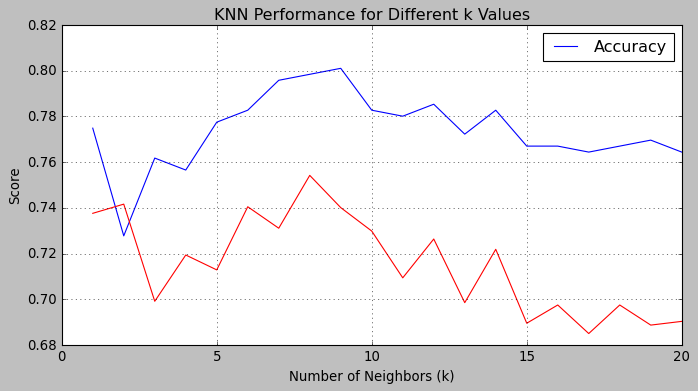

In [200]:
# USing MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Normalize the features using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of k values to test
k_values = range(1, 21)
accuracy_scores = []
recall_scores = []

# Train multiple KNN models for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class problems
    
    # Store results
    accuracy_scores.append(acc)
    recall_scores.append(rec)

    print(f"k={k}: Accuracy={acc:.4f}, Recall={rec:.4f}")

# Plot Accuracy and Recall vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, label="Accuracy")
plt.plot(k_values, recall_scores, color='red')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("KNN Performance for Different k Values")
plt.legend()
plt.grid()
plt.show()

In [202]:
best = n = -1
for i in range(0, len(accuracy_scores)):
    if accuracy_scores[i]+recall_scores[i] > best:
        best = accuracy_scores[i]+recall_scores[i]
        n = i+1; # 0-based
        
print(f"best_performance={best}, k={n}")

best_performance=1.5526429425890411, k=8


### Support Vector Machine (SVM) 

In [207]:
# Support Vector Machine
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [229]:
# for train data
def evaluate_train_model(model, X_train, y_train):
    
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    # Check if the model has predict_proba method
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_train)[:, 1]
        roc_auc = roc_auc_score(y_train, y_pred_proba)
    else:
        roc_auc = None

    cm = confusion_matrix(y_train, y_pred)
    report = classification_report(y_train, y_pred)

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    df = pd.DataFrame([metrics])
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)

    return df


# for test data
def evaluate_test_model(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Check if the model has predict_proba method
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    df = pd.DataFrame([metrics])
    print("Confusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)

    return df


In [231]:
evaluate_train_model(svc_model, X_train, y_train)

Confusion Matrix:
 [[273  78]
 [ 56 736]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       351
           1       0.90      0.93      0.92       792

    accuracy                           0.88      1143
   macro avg       0.87      0.85      0.86      1143
weighted avg       0.88      0.88      0.88      1143



,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.882765,0.904177,0.929293,0.916563,None


In [235]:
evaluate_test_model(svc_model, X_test, y_test)

Confusion Matrix:
 [[ 72  39]
 [ 34 237]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.66       111
           1       0.86      0.87      0.87       271

    accuracy                           0.81       382
   macro avg       0.77      0.76      0.77       382
weighted avg       0.81      0.81      0.81       382



,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.808901,0.858696,0.874539,0.866545,None


### Random Forest

In [240]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [242]:
evaluate_train_model(rf_model, X_train, y_train)

Confusion Matrix:
 [[350   1]
 [  0 792]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143



,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.999125,0.998739,1.0,0.999369,0.999998


In [244]:
evaluate_test_model(rf_model, X_test, y_test)

Confusion Matrix:
 [[ 72  39]
 [ 33 238]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       111
           1       0.86      0.88      0.87       271

    accuracy                           0.81       382
   macro avg       0.77      0.76      0.77       382
weighted avg       0.81      0.81      0.81       382



,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.811518,0.859206,0.878229,0.868613,0.874522
